<a href="https://colab.research.google.com/github/KauaHenSilva/python_predict_MNIST/blob/main/main_generate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST

In [56]:
!pip install tensorflow==2.16.1 --quiet

In [57]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import keras

In [58]:
tf.__version__

'2.16.1'

In [59]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import utils as kr_utils
from sklearn.model_selection import StratifiedKFold

In [60]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [61]:
(x_train.shape, x_test.shape), (y_train.shape, y_test.shape)

(((60000, 28, 28), (10000, 28, 28)), ((60000,), (10000,)))

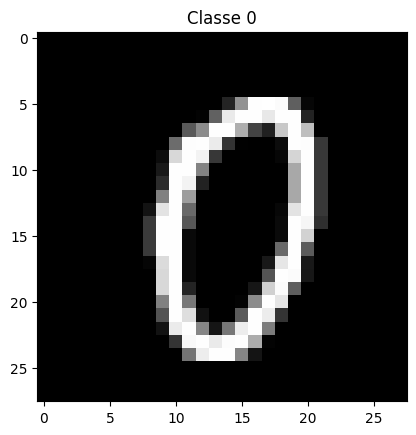

In [62]:
plt.imshow(x_train[1000], cmap='gray')
plt.title('Classe ' + str(y_train[1000]));

In [63]:
X_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
X_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
(x_train.shape, X_train.shape), (x_test.shape, X_test.shape)

(((60000, 28, 28), (60000, 28, 28, 1)), ((10000, 28, 28), (10000, 28, 28, 1)))

In [64]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [65]:
X_train /= 255
X_test /= 255
(X_train.max(), X_test.max()),( X_train.min(), X_test.min())

((1.0, 1.0), (0.0, 0.0))

In [66]:
y_train = kr_utils.to_categorical(y_train, 10)
y_test = kr_utils.to_categorical(y_test, 10)

In [67]:
gerador_treinamento = ImageDataGenerator(rotation_range=7, horizontal_flip=True, shear_range=0.2, height_shift_range=0.07, zoom_range=0.2)
gerador_test = ImageDataGenerator()

In [68]:
base_trein = gerador_treinamento.flow(X_train, y_train, batch_size=128)
base_test = gerador_test.flow(X_test, y_test, batch_size=128)

In [69]:
rede_neural = Sequential()
rede_neural.add(InputLayer(shape=(28,28,1)))
rede_neural.add(Conv2D(filters=32, kernel_size=(2,2), activation='relu'))
rede_neural.add(MaxPooling2D(pool_size=(2,2)))
rede_neural.add(Flatten())
rede_neural.add(Dense(units=128, activation='relu'))
rede_neural.add(Dense(units=10, activation='softmax'))
rede_neural.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [70]:
rede_neural.fit(base_trein, batch_size=128, epochs=5)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.7318 - loss: 0.8443
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9073 - loss: 0.2998
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9325 - loss: 0.2165
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9451 - loss: 0.1776
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9504 - loss: 0.1607


In [71]:
rede_neural.evaluate(base_test)

79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9657 - loss: 0.1122


[0.11034312844276428, 0.9656999707221985]